# **Objective-** Apply k-means++ and k-medoids clustering to Amazon food reviews dataset (Avg word2vec representation)

#### **About the dataset**
Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

* Number of reviews: 568,454 
* Number of users: 256,059 
* Number of products: 74,258 
* Timespan: Oct 1999 - Oct 2012 
* Number of Attributes/Columns in data: 10

##### **Attribute Information**:

1. Id ProductId - unique identifier for the product 
2. UserId - unqiue identifier for the user ProfileName 
3. HelpfulnessNumerator - number of users who found the review helpful 
4. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not 
5. Score - rating between 1 and 5 
6. Time - timestamp for the review 
7. Summary - brief summary of the review 
8. Text - text of the review

#### **Codes for-**
* Apply k-means++ and k-medoids algo to Avg word2vec featurization.
* Apply elbow method to plot loss vs k graph.

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
import warnings
warnings.filterwarnings('ignore')

## **1. Loading data**

In [5]:
#Loading the already prepared data
data=pd.read_csv('data.csv')
data.head(7)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_text
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh recit car dr...
1,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,b'rememb see show air televis year sister late...
2,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,b'beetlejuic well written movi everyth excel a...
3,212472,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",b'twist rumplestiskin captur star michael keat...
4,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,b'beetlejuic excel funni keaton hilari wacki g...
5,212533,230348,B00004RYGX,A1048CYU0OV4O8,Judy L. Eans,2,2,1,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,b'one movi movi fill whatev els want call'
6,212458,230269,B00004RYGX,A1B2IZU1JLZA6,Wes,19,23,0,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",b'alway enjoy funni didnt hesit pick clamshel ...


In [7]:
#taking 100k datapoints
sample_data=data.sample(100000)

In [8]:

#getting the list of sentences in a 'list'
i=0
p=''
list_of_sentences=[]
for sent in sample_data['Cleaned_text'].values:
    filtered_sentence=[]    
    for w in sent.split():
        if(w==sent.split()[0]):
            w=w[2:]
            #p=w
        filtered_sentence.append(w.lower())       
    list_of_sentences.append(filtered_sentence)

In [9]:
#defining a word2vec model
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sentences,min_count=5,size=60, workers=4)    
words=list(w2v_model.wv.vocab)
print(len(words))

12973


In [10]:
#calculating avg word2vec
vectors=[];
for sentence in list_of_sentences:
    sentence_vector=np.zeros(60)
    count_vec=0;
    for word in sentence:
        try:
            vec=w2v_model.wv[word]
            sentence_vector+=vec
            count_vec+=1;
        except:
            pass
    sentence_vector/=count_vec
    vectors.append(sentence_vector)

In [11]:
z=list(np.unique(np.where(np.isnan(vectors))[0]))
z

[32692, 44616, 56869, 71140, 94989]

In [12]:
vectors=np.delete(vectors, z, axis=0)
vectors=normalize(vectors)

In [14]:
sample_data=sample_data.drop(sample_data.index[z], axis=0)
len(sample_data)

99995

In [15]:
len(vectors)

99995

## **2. Applying k-means clustering method to Avg word2vec featurization**

In [16]:
# code borrowed from http://www.awesomestats.in/python-cluster-validation/
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init=5 )
  clusters.fit( vectors )
  cluster_errors.append( clusters.inertia_ )

In [17]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [18]:
clusters_df[0:20]

,cluster_errors,num_clusters
0,68429.249595,1
1,61961.614613,2
2,58070.104949,3
3,54807.356339,4
4,52875.391371,5
5,51528.022392,6
6,50278.564956,7
7,49288.903770,8
8,48412.080096,9
9,47683.617239,10


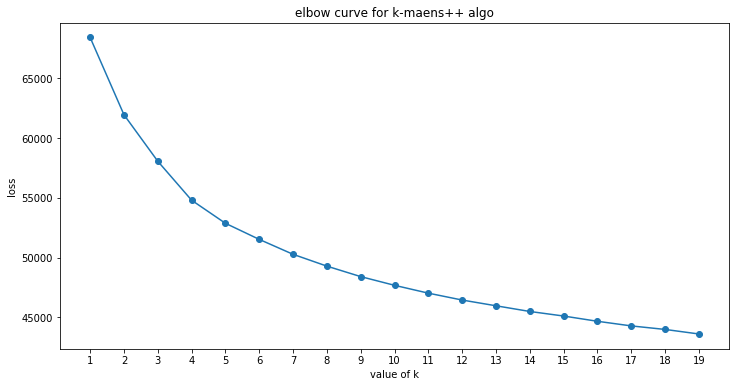

In [19]:
#plotting no. of clusters vs loss plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot( list(range(1,20)), clusters_df.cluster_errors, marker = "o" )
plt.xticks(list(range(1,20)))
plt.title('elbow curve for k-maens++ algo')
plt.xlabel('value of k')
plt.ylabel('loss')
plt.show()

In [20]:
sample_data['cluster_label']=clusters.labels_
sample_data.head(5)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_text,cluster_label
77460,149391,162089,B000ER3QM8,AK6UODXG6M74L,"S. King ""stepking""",0,0,1,1261958400,Great for the chewer,Our eight month old lab is a big chewer. He h...,b'eight month old lab big realli love held dog...,14
77102,113034,122615,B0001I1HFS,A3PEOF0GX4EN38,"Carolyn Rampone ""Carolyn D'Amico Rampone""",1,2,1,1261785600,Excellent-True Flavor,"This is an excellent product, easy to make and...",b'excel easi make true shop popular find diffi...,7
5133,67825,73710,B0002AHT84,A8K2P02I29PI3,James Dross,7,7,1,1163030400,Loumidis Papagalos Greek coffee,I have used other brands and this is by far th...,b'use brand far best',5
351459,35165,38244,B000634HD2,A11RCRY5Q88JYC,Mandee,0,0,1,1349136000,Natural Balance - Vegetarian,"My beagle has severe food allergies, especiall...",b'beagl sever food especi anyth high beef alte...,11
146023,319509,345883,B002FUE60I,AS8I7R9K0TYBL,Marta,0,0,1,1298764800,Wonderful waffle!!,My daughter brought some of theses stroopwaffl...,b'daughter brought these stroopwaffl home cant...,17


In [21]:
label=sample_data.groupby(['cluster_label'])['cluster_label'].count()

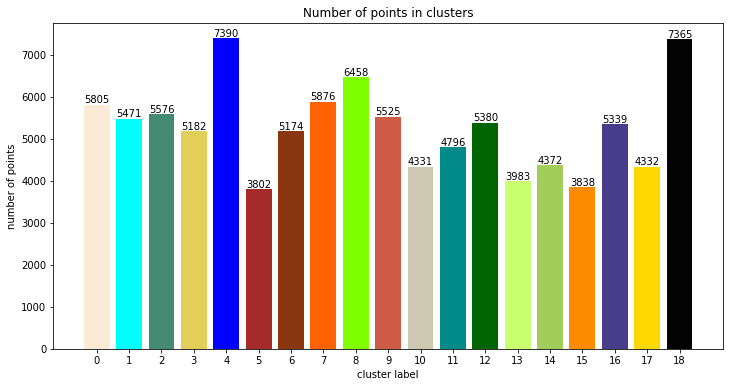

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
mycolors = ['#FAEBD7', '#00FFFF', '#458B74', '#E3CF57', '#0000FF', '#A52A2A', '#8A360F', '#FF6103', '#7FFF00', '#CD5B45', '#CDC8B1', '#008B8B', '#006400', '#CAFF70', '#A2CD5A', '#FF8C00', '#483D8B', '#FFD700', '#030303']
rects1 = ax.bar(list(range(0,19)), label, color=mycolors)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)
plt.xticks(list(range(0,19)))
plt.xlabel('cluster label')
plt.ylabel('number of points')
plt.title('Number of points in clusters')
plt.show()

In [28]:
#randomly select reviews from each cluster

import random

for i in range(19):
    id=list(sample_data['Id'][sample_data['cluster_label']==i])
    random_id=[]
    for j in range(3):
        number=random.choice(id)
        random_id.append(number)
        id.remove(number)
        
    print('selecting random reviews from cluster label : ',i)
    print('*'*60)
    for j in random_id:
        print(sample_data[sample_data['Id']==j].iloc[0]['Text'])
        print('\n')
        
        

selecting random reviews from cluster label :  0
************************************************************
I have been using this product for my soup for many many years.  I add my own meat and additional vegetables.  It makes a great dinner especially on a cold winter evening.  I make a crusty bread or make some cornbread and my family really enjoys the meal.


The Zesty Lemon and Sea Salt Chocolate Oatmeal are my favorite!  They are great with LOTS of different wines...sparkling or not.  Parmesan Thyme was a terrific addition to my cheese and wine platter...equally delicious with wine!


Country Sweet is the best sauce for barbeque chicken, ribs and stir frys...Awesome sauce.  My daughter and I tasted it over 20 years ago in Rochester NY and fell in love with it...Great buy!!


selecting random reviews from cluster label :  1
************************************************************
product is so so so amazing!!!!  we even bought it for a friend, and the price is great also!  w

#### **Observations-**
1. k-means++ works very well for avg word2vec.
2. easily find the relation between the reviews of the cluster.
3. some cluster talks about meat, some about grocery items, some directly praising products, some cluster talks about tea , cluster-17 talks about cookies , cluster-18 talks about coffee
4. overall working fine

## **3. Applying k-medoids clustering method to avg word2vec representation**

In [29]:
# taking just 25k points 
sample_data=data.sample(25000)

#getting the list of sentences in a 'list'
i=0
p=''
list_of_sentences=[]
for sent in sample_data['Cleaned_text'].values:
    filtered_sentence=[]    
    for w in sent.split():
        if(w==sent.split()[0]):
            w=w[2:]
            #p=w
        filtered_sentence.append(w.lower())       
    list_of_sentences.append(filtered_sentence)

In [30]:
#defining a word2vec model
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sentences,min_count=5,size=60, workers=4)    
words=list(w2v_model.wv.vocab)
print(len(words))

6794


In [31]:
#calculating avg word2vec
vectors=[];
for sentence in list_of_sentences:
    sentence_vector=np.zeros(60)
    count_vec=0;
    for word in sentence:
        try:
            vec=w2v_model.wv[word]
            sentence_vector+=vec
            count_vec+=1;
        except:
            pass
    sentence_vector/=count_vec
    vectors.append(sentence_vector)

In [32]:
z=list(np.unique(np.where(np.isnan(vectors))[0]))
z

[7893]

In [33]:
vectors=np.delete(vectors, z, axis=0)
vectors=normalize(vectors)

In [34]:
sample_data=sample_data.drop(sample_data.index[z], axis=0)
len(sample_data)

24999

In [35]:
len(vectors)

24999

In [36]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(vectors, metric='euclidean')
D.shape

(24999, 24999)

In [37]:
# For finding optimal value of number of clusters.
def compute_loss(M, C, data): # Squared Loss. !!
    loss = 0.0
    for key, arr in C.items():
        for pos in arr:
            loss = loss + ((data[M[key]] - data[pos]).sum()) ** 2
    
    return loss

In [38]:
# code borrowed from https://raw.githubusercontent.com/letiantian/kmedoids/master/kmedoids.py

import numpy as np
import random

def kMedoid(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

In [39]:

# Choosing the best cluster using Elbow Method.
cluster_range=list(range(2,20))
errors = []
for cluster in cluster_range:
    M, C = kMedoid(D, cluster) # Training Clustering.
    errors.append(compute_loss(M, C, vectors))
    #print(cluster)

In [41]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": errors } )

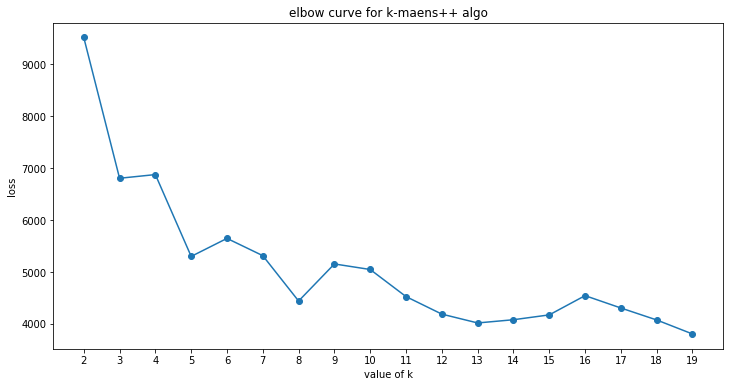

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (12,6))
ax.plot( list(range(2,20)), clusters_df.cluster_errors, marker = "o" )
plt.xticks(list(range(2,20)))
plt.title('elbow curve for k-maens++ algo')
plt.xlabel('value of k')
plt.ylabel('loss')
plt.show()

In [43]:
optimal_clusters = np.argmin(errors)+2

In [44]:
print('Optimal no. of cluster = ',optimal_clusters)

Optimal no. of cluster =  19


In [45]:
# K-medoids method using optimal number of cluster
M,C=kMedoid(D,optimal_clusters)

In [46]:
# finding the length of each clusters
cluster_label=[]
label_length=[]
for i in range(len(C)):
    label_length.append(len(C[i]))
    cluster_label.append(i)

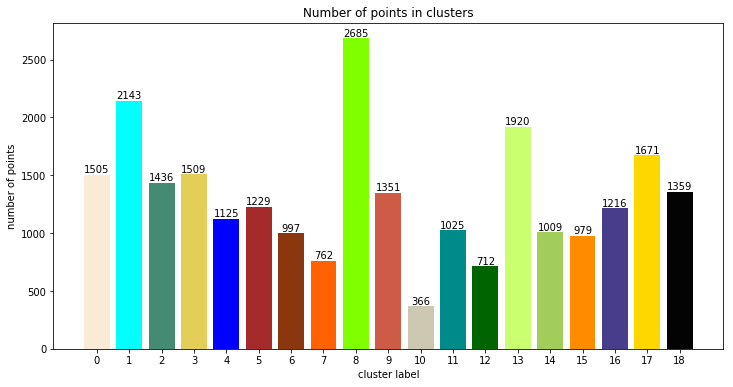

In [48]:
fig, ax = plt.subplots(figsize=(12,6))
mycolors = ['#FAEBD7', '#00FFFF', '#458B74', '#E3CF57', '#0000FF', '#A52A2A', '#8A360F', '#FF6103', '#7FFF00', '#CD5B45', '#CDC8B1', '#008B8B', '#006400', '#CAFF70', '#A2CD5A', '#FF8C00', '#483D8B', '#FFD700', '#030303']
rects1 = ax.bar(cluster_label, label_length, color=mycolors)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)
plt.xticks(list(range(0,19)))
plt.xlabel('cluster label')
plt.ylabel('number of points')
plt.title('Number of points in clusters')
plt.show()

In [52]:
#randomly select reviews from each cluster

import random

for i in range(len(C)):
    id=list(C[i])
    random_id=[]
    if(len(C[i])<3):
        num=len(C[i])
    else:
        num=3
    for j in range(num):
        number=random.choice(id)
        random_id.append(number)
        id.remove(number)
    print('selected random reviews from cluster label : '.upper(),i)
    print('*'*60)
    print('central review')
    print('-'*30)
    print(sample_data.iloc[M[i]]['Text'])
    print('-'*30)
    print('\n')
    print('review belongs to cluster ',i)
    print('-'*30)
    for j in random_id:
        print(sample_data.iloc[j]['Text'])
        print('\n')
        
        

SELECTED RANDOM REVIEWS FROM CLUSTER LABEL :  0
************************************************************
central review
------------------------------
(Because we tried all three, I wanted to post these on each pouch page.)<br /><br />YUM! Our 17 month old daughter loves them. When we heard about these new pouches, they were a _must try_. We couldnt decide on a fruit combination, so we ordered a case of each. This worked out well, because the order qualified for amazons free shipping. They arrived very quickly in easy to open cases.<br /><br />We consolidated them to a box in the pantry so we could get to them faster and because those pouches can kind of slide around. :) Our daughter is all about choices right now and so we let her decide which one she'd like to try first. She looked carefully at each of them then said "NANA! ARN! BUH-NEE! HOP! HOP!" and so chose the Mango, Banana and Orange...and it remains her favorite of the three (although, she would never give up the others if

#### **Observations-**
1. it tries to cluster the same type of reviews.
2. some of the reviews seems from a same group by directly seeing them because of some noun common in 
them like dog, tea, coffee.
3. clustering using k-medoids for avg word2vec works good but also effected by outliers.

## **Consludion-**
1. using k-means clustering technique, easily find the similarity in cluster's review. because there are some noun common in the reviews of the cluster